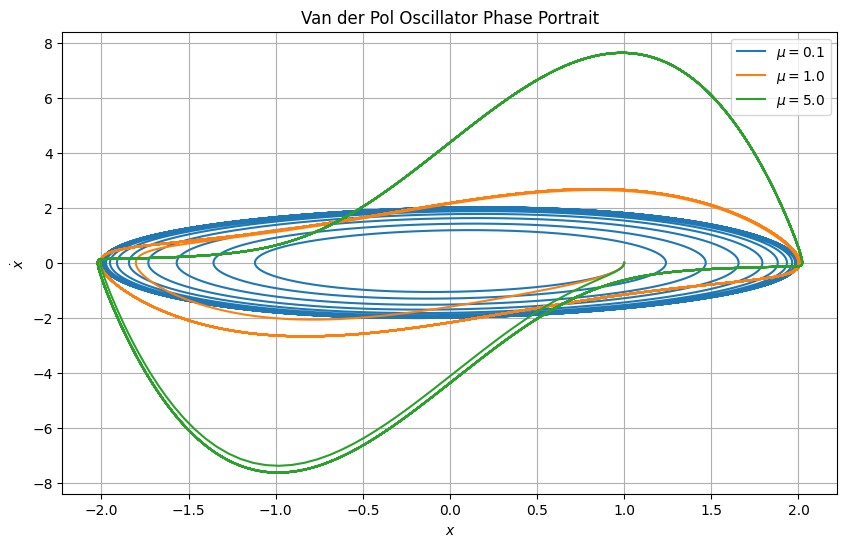

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def vdp(t, z, mu):
    """
    Van der Pol oscillator.
    z = [x, dx/dt]
    Returns: [dx/dt, d2x/dt2]
    """
    x, dxdt = z
    # d^2x/dt^2 = mu(1 - x^2)*dx/dt - x
    d2xdt2 = mu*(1 - x**2)*dxdt - x
    return [dxdt, d2xdt2]

# Parameters
mus = [0.1, 1.0, 5.0]  # Different values of mu to explore
t_span = (0, 100)  # Time interval for simulation
z0 = [1.0, 0.0]     # Initial conditions: x(0)=1, dx/dt(0)=0
num_points = 10000   # Number of time points

plt.figure(figsize=(10, 6))

for mu in mus:
    # Solve the ODE
    t_eval = np.linspace(t_span[0], t_span[1], num_points)
    sol = solve_ivp(vdp, t_span, z0, args=(mu,), t_eval=t_eval, rtol=1e-9, atol=1e-9)

    x = sol.y[0]
    dxdt = sol.y[1]

    # Plot the trajectory in the phase plane
    plt.plot(x, dxdt, label=f'$\mu = {mu}$')

# Customize the plot
plt.title('Van der Pol Oscillator Phase Portrait')
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.grid(True)
plt.legend()
plt.show()
